In [2]:

-- Hierarchical SQL, also known as hierarchical querying, involves working with data that has a parent-child 
-- or hierarchical relationship. The classic example would probably be a employee and boss relationship.


-- Incidentally, we are also witnessing the logic of a SELF JOIN here. This is where a table is joined with itself. 


-- DROP TABLE Employees
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    ManagerID INT,
    EmployeeName VARCHAR(50),
    Salary DECIMAL(10, 2)
);

INSERT INTO Employees (EmployeeID, ManagerID, EmployeeName, Salary)
VALUES
    (1, NULL, 'CEO', 100000),
    (2, 1, 'ManagerA', 80000),
    (3, 1, 'ManagerB', 85000),
    (4, 2, 'EmployeeA1', 81000),
    (5, 2, 'EmployeeA2', 65000),
    (6, 3, 'EmployeeB1', 70000),
    (7, 3, 'EmployeeB2', 72000);

SELECT
    e.EmployeeID,
    e.ManagerID,
    e.EmployeeName,
    e.Salary,
    CASE WHEN e.Salary > m.Salary THEN 'Yes' ELSE 'No' END AS HigherThanBoss
FROM
    Employees e
LEFT JOIN
    Employees m 
ON e.ManagerID = m.EmployeeID;


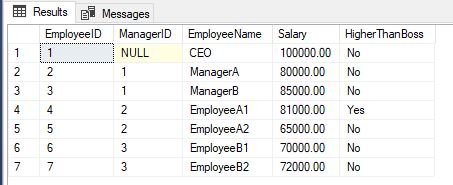

In [1]:

-- We use a LEFT JOIN here to show the CEO role. If we used an INNER JOIN, the CEO role wouldn't be displayed because the 
-- CEO is the top manager in the 'Employees' table named with an alias of 'm'.

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Image1.JPG")


In [ ]:

-- The "gaps and islands" problem is a common challenge encountered in data analysis, especially when dealing 
-- with sequential or time-series data. The problem involves identifying and categorizing consecutive ranges or 
-- groups of data points based on specific conditions.

CREATE TABLE LoginEvents (
    EventID INT PRIMARY KEY,
    UserID INT,
    EventType VARCHAR(10),
    EventTimestamp DATETIME
);

INSERT INTO LoginEvents (EventID, UserID, EventType, EventTimestamp)
VALUES
    (1, 1, 'Login', '2023-01-01 10:00:00'),
    (2, 1, 'Logout', '2023-01-01 12:00:00'),
    (3, 1, 'Login', '2023-01-01 13:00:00'),
    (4, 1, 'Logout', '2023-01-01 15:00:00'),
    (5, 2, 'Login', '2023-01-01 11:00:00'),
    (6, 2, 'Logout', '2023-01-01 14:00:00'),
    (7, 1, 'Login', '2023-01-01 16:00:00')


WITH RankedEvents AS (
    SELECT
        EventID,
        UserID,
        EventType,
        EventTimestamp,
        ROW_NUMBER() OVER (PARTITION BY UserID ORDER BY EventTimestamp) -
        ROW_NUMBER() OVER (PARTITION BY UserID, EventType ORDER BY EventTimestamp) AS GroupID
    FROM
        LoginEvents
)
SELECT
    UserID,
    MIN(EventTimestamp) AS LoginStartTime,
    MAX(EventTimestamp) AS LoginEndTime
FROM
    RankedEvents
WHERE
    EventType = 'Login'
GROUP BY
    UserID, GroupID


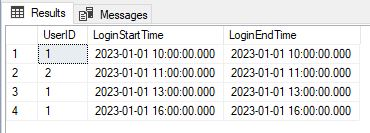

In [2]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Image2.JPG")


In [ ]:

-- Here is a standard scenario where data is stacked vertically, with lots of rows and only a few columns.
-- If we want to turn rows of data into columns of data, we need to pivot it.

CREATE TABLE SalesData (
    ProductName NVARCHAR(50),
    Month NVARCHAR(10),
    SalesAmount DECIMAL(10, 2)
);

INSERT INTO SalesData (ProductName, Month, SalesAmount)
VALUES
    ('ProductA', 'Jan', 1000),
    ('ProductA', 'Feb', 1200),
    ('ProductA', 'Mar', 1500),
    ('ProductB', 'Jan', 800),
    ('ProductB', 'Feb', 900),
    ('ProductB', 'Mar', 1000)


Select * From SalesData


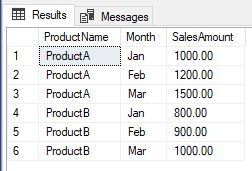

In [7]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Image3.JPG")


In [ ]:

SELECT *
FROM (
    SELECT ProductName, Month, SalesAmount
    FROM SalesData
) AS SourceTable
PIVOT (
    SUM(SalesAmount)
    FOR Month IN ([Jan], [Feb], [Mar])
) AS PivotTable


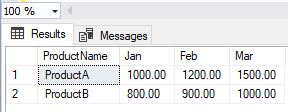

In [6]:

-- A pivot takes lots of rows and converts it into any/all necessary columns.
-- We pivot a data set to make it easier for a human to read, based on certain conditions, or business requirements.

from IPython.display import Image
from IPython.core.display import HTML 
PATH ="C:\\Users\\"
Image(filename = PATH + "Image4.JPG")


In [ ]:

-- We can also easily unpivot a dataset, to convert a bunch of columns into just a few columns.

CREATE TABLE PivotedSalesData (
    ProductName NVARCHAR(50),
    Jan DECIMAL(10, 2),
    Feb DECIMAL(10, 2),
    Mar DECIMAL(10, 2)
);

INSERT INTO PivotedSalesData (ProductName, Jan, Feb, Mar)
VALUES
    ('ProductA', 1000, 1200, 1500),
    ('ProductB', 800, 900, 1000);


Select * From PivotedSalesData


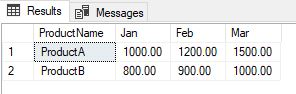

In [9]:

-- Several columns...

from IPython.display import Image
from IPython.core.display import HTML 
PATH ="C:\\Users\\"
Image(filename = PATH + "Image5.JPG")


In [ ]:

-- In this example, four columns becomes three columns.

SELECT ProductName, Month, SalesAmount
FROM (
    SELECT ProductName, Jan, Feb, Mar
    FROM PivotedSalesData
) AS SourceTable
UNPIVOT (
    SalesAmount FOR Month IN ([Jan], [Feb], [Mar])
) AS UnpivotedTable;


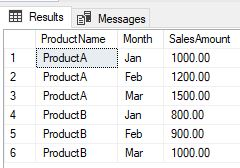

In [8]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH ="C:\\Users\\"
Image(filename = PATH + "Image6.JPG")


In [ ]:

-- You can use CTEs to simplify complex queries, improve readability, and break down the logic into more manageable parts. 

-- The CTE named DepartmentTotalSalary calculates the total salary for each department using the SUM aggregate function.

-- The main query then joins the Employees table with the CTE on the DepartmentID column and retrieves the employee 
-- information along with the total salary for their respective departments.
    
-- DROP TABLE Employees
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    DepartmentID INT,
    EmployeeName VARCHAR(50),
    Salary DECIMAL(10, 2)
);

-- Sample data
INSERT INTO Employees (EmployeeID, DepartmentID, EmployeeName, Salary)
VALUES
    (1, 101, 'Alice', 60000),
    (2, 101, 'Bob', 70000),
    (3, 102, 'Charlie', 80000),
    (4, 103, 'David', 75000),
    (5, 103, 'Eva', 90000);

-- CTE to calculate total salary for each department
WITH DepartmentTotalSalary AS (
    SELECT
        DepartmentID,
        SUM(Salary) AS TotalSalary
    FROM
        Employees
    GROUP BY
        DepartmentID
)

-- Query using the CTE
SELECT
    e.EmployeeID,
    e.EmployeeName,
    e.Salary,
    dts.TotalSalary
FROM
    Employees e
JOIN
    DepartmentTotalSalary dts 
ON e.DepartmentID = dts.DepartmentID


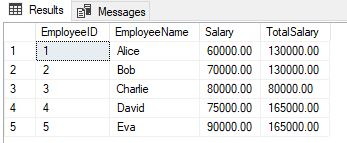

In [3]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH ="C:\\Users\\"
Image(filename = PATH + "Image7.JPG")


In [ ]:

-- Recursive Common Table Expressions (CTEs) are used when you need to perform recursion, such as traversing 
-- hierarchical data structures, such as employee and manager hierarchies, and performing some kind of aggregation.
-- In thie following scenario, each employee reports to a manager, and we want to calculate the total number of 
-- subordinates for each manager.

-- DROP TABLE Employees
-- Sample Employees table
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    ManagerID INT,
    EmployeeName VARCHAR(50)
);

-- Sample data
INSERT INTO Employees (EmployeeID, ManagerID, EmployeeName)
VALUES
    (1, NULL, 'CEO'),
    (2, 1, 'ManagerA'),
    (3, 1, 'ManagerB'),
    (4, 2, 'EmployeeA1'),
    (5, 2, 'EmployeeA2'),
    (6, 3, 'EmployeeB1'),
    (7, 3, 'EmployeeB2');

-- Recursive CTE to calculate total number of subordinates for each manager
WITH RecursiveSubordinatesCTE AS (
    SELECT
        EmployeeID,
        ManagerID,
        EmployeeName,
        1 AS SubordinateCount -- Initial count for each employee
    FROM
        Employees
    WHERE
        ManagerID IS NULL -- Anchor member (CEO)

    UNION ALL

    SELECT
        e.EmployeeID,
        e.ManagerID,
        e.EmployeeName,
        r.SubordinateCount + 1 -- Increment count for each subordinate
    FROM
        Employees e
    JOIN
        RecursiveSubordinatesCTE r ON e.ManagerID = r.EmployeeID
)
-- Query using the recursive CTE
SELECT
    EmployeeID,
    EmployeeName,
    SubordinateCount
FROM
    RecursiveSubordinatesCTE;


In [ ]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH ="C:\\Users\\"
Image(filename = PATH + "Image8.JPG")


In [ ]:

-- 'EXCEPT' operates on entire result sets, returning distinct rows that are in the first result set 
-- but not in the second.

-- 'NOT IN' filters rows based on a specified column's value compared to a set of values or the result 
-- set of a subquery.

-- NOTICE...the difference will be subtle and maybe there will be nodifference at all.


-- Create EmployeesOld table
CREATE TABLE EmployeesOld (
    EmployeeID INT PRIMARY KEY,
    EmployeeName VARCHAR(50)
);

-- Create EmployeesNew table
CREATE TABLE EmployeesNew (
    EmployeeID INT PRIMARY KEY,
    EmployeeName VARCHAR(50)
);

-- Insert sample data into EmployeesOld
INSERT INTO EmployeesOld (EmployeeID, EmployeeName)
VALUES
    (1, 'Alice'),
    (2, 'Bob'),
    (3, 'Charlie'),
    (4, 'David');

-- Insert sample data into EmployeesNew
INSERT INTO EmployeesNew (EmployeeID, EmployeeName)
VALUES
    (1, 'Alice'),
    (3, 'Charlie'),
    (5, 'Eva');


In [ ]:

-- Retrieve employees in EmployeesOld but not in EmployeesNew
SELECT EmployeeID, EmployeeName
FROM EmployeesOld
EXCEPT
SELECT EmployeeID, EmployeeName
FROM EmployeesNew;


In [ ]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryans\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\SQL\\"
Image(filename = PATH + "Image9.JPG")


In [ ]:

-- Retrieve employees in EmployeesOld not assigned to any project in EmployeesNew
SELECT EmployeeID, EmployeeName
FROM EmployeesOld
WHERE EmployeeID NOT IN (SELECT EmployeeID FROM EmployeesNew);


In [ ]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Image10.JPG")


In [ ]:

-- Dynamic SQL allows you to construct SQL statements dynamically at runtime. This can be useful in scenarios 
-- where the structure of the SQL statement depends on certain conditions or variables.


-- DROP TABLE Events
-- Sample table creation
CREATE TABLE Events (
    EventID INT PRIMARY KEY,
    EventName VARCHAR(50),
    EventDate DATE
);

-- Sample data insertion
INSERT INTO Events (EventID, EventName, EventDate)
VALUES
    (1, 'EventA', '2023-03-15'),
    (2, 'EventB', '2023-04-20'),
    (3, 'EventC', '2023-05-25'),
    (4, 'EventD', '2023-06-10');



-- Sample stored procedure with dynamic SQL for date range
CREATE PROCEDURE GetEventsByDateRange
    @StartDate DATE,
    @EndDate DATE
AS
BEGIN
    DECLARE @SQL NVARCHAR(MAX);

    -- Construct dynamic SQL statement
    SET @SQL = N'
        SELECT EventID, EventName, EventDate
        FROM Events
        WHERE EventDate BETWEEN @Start AND @End';

    -- Execute dynamic SQL statement
    EXEC sp_executesql @SQL, N'@Start DATE, @End DATE', @Start = @StartDate, @End = @EndDate;
END;



-- Execute the stored procedure with a date range
EXEC GetEventsByDateRange @StartDate = '2023-04-01', @EndDate = '2023-06-30';


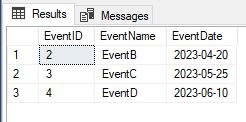

In [1]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "Image11.JPG")


In [ ]:

-- Here is a creative way to parse a datetime feature and create some logic to define three conditions:
-- if 7AM to 11PM Monday to Friday, give me 5x16 (working days and awake hours)
-- if 7AM to 11PM Saturday to Sunday, give me 2x16 (weekends and awake hours)
-- if 11PM to 7AM ANY DAY, give me 7x8 (every day andsleeping hours)


IF OBJECT_ID('MyTable') IS NOT NULL  
   DROP TABLE MyTable;  
GO


CREATE TABLE MyTable (
    ID INT PRIMARY KEY,
    EventDateTime DATETIME,
    EventValue INT
);

-----------------------------------------------------------------------------------------------

DECLARE @StartDate DATETIME = '2022-01-01';
DECLARE @EndDate DATETIME = '2023-12-31';
DECLARE @IDCounter INT = 1;

WHILE @StartDate <= @EndDate
BEGIN
    INSERT INTO MyTable (ID, EventDateTime, EventValue)
    VALUES
        (@IDCounter, @StartDate, CAST((RAND() * 10) + 0.5 AS DECIMAL(5,2)));

    SET @IDCounter = @IDCounter + 1;
    SET @StartDate = DATEADD(HOUR, 1, @StartDate); -- Assuming hourly data
END

-----------------------------------------------------------------------------------------------

SELECT
    ID,
    EventDateTime,
    EventValue,
    CASE
        WHEN (DATEPART(dw, EventDateTime) BETWEEN 2 AND 6 AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN '5x16'
        WHEN (DATEPART(dw, EventDateTime) IN (1, 7) AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN '2x16'
        WHEN (DATEPART(HOUR, EventDateTime) >= 23 or (DATEPART(HOUR, EventDateTime) <=6)) THEN '7x8'
        ELSE '' -- Handle null case
    END AS TimeCategory
FROM MyTable


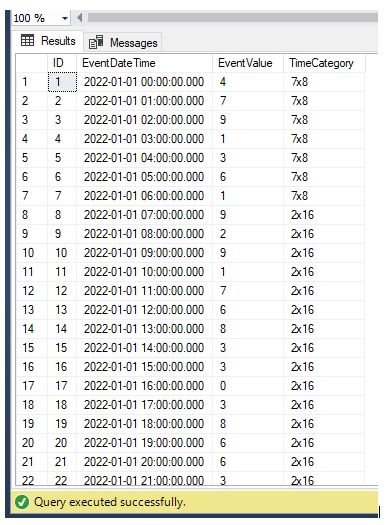

In [3]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


In [1]:

-- Here is a way to apply the same logic, but create new columns/features, instead of putting everything in the same column.

SELECT
    ID,
    EventDateTime,
    EventValue,
    AVG(CASE WHEN (DATEPART(dw, EventDateTime) BETWEEN 2 AND 6 AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN EventValue ELSE 0 END) AS [5x16],
    AVG(CASE WHEN (DATEPART(dw, EventDateTime) IN (1, 7) AND DATEPART(HOUR, EventDateTime) BETWEEN 7 AND 22) THEN EventValue ELSE 0 END) AS [2x16],
    AVG(CASE WHEN (DATEPART(HOUR, EventDateTime) >= 23 or (DATEPART(HOUR, EventDateTime) <=6)) THEN  EventValue ELSE 0 END) AS [7x8]
FROM MyTable
GROUP BY     ID,
    EventDateTime,
    EventValue


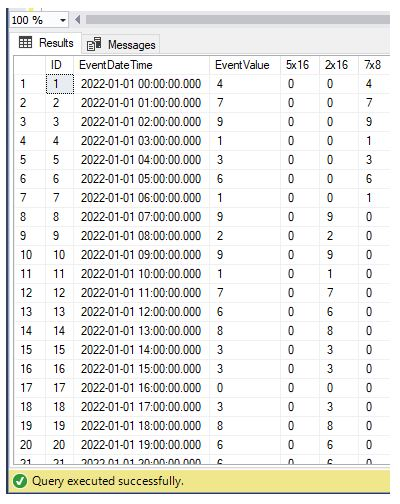

In [4]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")
